# Analisis Diciembre

In [ ]:
import pandas as pd 
import numpy as np 
import os
from datetime import datetime, date
import datetime as dt
import xlrd
from xlrd.xldate import xldate_as_tuple
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
ruta = '/home/estadistico/Documents/Erick/'
ruta_brad = '/home/estadistico/Documents/Erick/Bradesco/'
ruta_liver = '/home/estadistico/Documents/Erick/Liverpool/Pagos/'
mes = 1
mes2 = 'Enero'

In [3]:
pc0 = os.listdir(''+ruta_brad+'Facturacion_c0/')
pagos_c0 = pd.DataFrame()
for i in pc0:
    #pagos_c0_new = pd.read_excel(''+ruta_brad+'Facturacion_c0/'+i+'',converters={'TARJETA':str})
    pagos_c0_new = pd.read_excel(''+ruta_brad+'Facturacion_c0/'+i+'')
    pagos_c0 = pd.concat([pagos_c0,pagos_c0_new],ignore_index=True)
    pagos_c0 = pagos_c0.drop_duplicates()
pagos_c0 = pd.pivot_table(pagos_c0,index=['PRODUCTO','TARJETA','FECHA','PV','%'],values=['PAGO','COMISION.FINAL'],aggfunc=np.sum)
pagos_c0 = pd.DataFrame(pagos_c0.to_records())
pagos_c0.columns = ['PRODUCTO','TARJETA','FECHA','BUCKET','PORCENTAJE','COMISION','PAGO']
pagos_c0.head(1)

,PRODUCTO,TARJETA,FECHA,BUCKET,PORCENTAJE,COMISION,PAGO
0,AURRERA VISA,4812830001473000,2020-12-20,4,0.08,160.0,2000.0


In [ ]:
pextra = os.listdir(''+ruta_brad+'Facturacion_extra/')
pagos_extra = pd.DataFrame()
for i in pextra:
    #pagos_extra_new = pd.read_excel(''+ruta_brad+'Facturacion_extra/'+i+'',converters={'TARJETA':str})
    pagos_extra_new = pd.read_excel(''+ruta_brad+'Facturacion_extra/'+i+'')
    pagos_extra = pd.concat([pagos_extra,pagos_extra_new],ignore_index=True)
    pagos_extra = pagos_extra.drop_duplicates()
pagos_extra = pd.pivot_table(pagos_extra,index=['PRODUCTO','TARJETA','FECHA','BUCKET','PORCENTAJE'],values=['PAGO','COMISION'],aggfunc=np.sum)
pagos_extra = pd.DataFrame(pagos_extra.to_records())
pagos_extra.head(3)

In [ ]:
ac0 = os.listdir(''+ruta_brad+'Asignacion_c0/CSV/')
asignacion_c0 = pd.DataFrame()
for i in ac0:
    #asig_c0 = pd.read_csv(''+ruta_brad+'Asignacion_c0/CSV/'+i+'',converters={'NUMERO_TARJETA':str,'NUMERO_CUENTA':str},encoding= 'unicode_escape')
    asig_c0 = pd.read_csv(''+ruta_brad+'Asignacion_c0/CSV/'+i+'',encoding= 'unicode_escape')
    asig_c0 = asig_c0[['CODIGO_ORG','NUMERO_CUENTA','NUMERO_TARJETA','ESTADO','CP','RFC','SALDO_TOTAL','PAGO_DESCUENTO','PAGOSVENCIDOS','CORTE','MES ASIGNACION']]
    asignacion_c0 = pd.concat([asignacion_c0,asig_c0],ignore_index=True)
    print(i)
asignacion_c0 = asignacion_c0.drop_duplicates()

In [ ]:
aextra = os.listdir(''+ruta_brad+'Asignacion_extra/CSV/')
aemes = ['01/09/2020','01/10/2020','01/12/2020','01/01/2021','01/09/2020','01/04/2020','01/11/2020','01/07/2020','01/03/2020','01/08/2020','01/06/2020','01/05/2020','01/02/2020','01/01/2020']
asignacion_extra = pd.DataFrame()
for i,j in zip(aextra,aemes):
    #asig_extra = pd.read_csv(''+ruta_brad+'Asignacion_extra/CSV/'+i+'',converters={'NUMERO DE TARJETA':str,'NUMERO DE CUENTA':str},encoding= 'unicode_escape')
    asig_extra = pd.read_csv(''+ruta_brad+'Asignacion_extra/CSV/'+i+'',encoding= 'unicode_escape')
    asig_extra = asig_extra[['PRODUCTO','NUMERO DE CUENTA','NUMERO DE TARJETA','ESTADO','CP','RFC','SALDO TOTAL','PAGO_DESCUENTO','TIPO_ASIGNACION','CORTE']]
    asig_extra['MES ASIGNACION'] = j
    asignacion_extra = pd.concat([asignacion_extra,asig_extra],ignore_index=True)
    print(i)
asignacion_extra = asignacion_extra.drop_duplicates()    
asignacion_extra.columns = ['CODIGO_ORG','NUMERO_CUENTA','NUMERO_TARJETA','ESTADO','CP','RFC','SALDO_TOTAL','PAGO_DESCUENTO','PAGOSVENCIDOS','CORTE','MES ASIGNACION']

In [1]:
# pagos_liver = pd.read_excel(''+ruta_liver+'Union pagos.xlsx')

In [2]:
codigo_correcto = pd.read_excel(''+ruta_brad+'CODIGOS_PRO.xlsx')

NameError: name 'pd' is not defined

In [ ]:
asignacion_brad = pd.concat([asignacion_c0,asignacion_extra],ignore_index=True)
pagos_brad = pd.concat([pagos_c0,pagos_extra],ignore_index=True)

# PAGOS C0

In [ ]:
pagos_c0 = pagos_c0.drop_duplicates(subset=['PRODUCTO','TARJETA','PAGO','FECHA','BUCKET'])
pagos_c0['MONTH'] = pagos_c0['FECHA'].dt.month
pagos_c0['YEAR'] = pagos_c0['FECHA'].dt.year
pagos_c0['DAY'] = pagos_c0['FECHA'].dt.day
pagos_c0.head(3)

In [ ]:
pagos_mes_c0 = pagos_c0.loc[pagos_c0['MONTH']==mes]
pivot_mes_c0 = pd.pivot_table(pagos_mes_c0,index=['YEAR'],columns=['BUCKET'],values=['PAGO'],aggfunc='sum')
pivot_mes_c0 = pd.DataFrame(pivot_mes_c0.to_records())
pivot_mes_c0.columns = ['YEAR','PAGOV 4','PAGOV 5','PAGOV 6']
pivot_mes_c0['PAGOV 4'] = ['${:,.2f}'.format(x) for x in pivot_mes_c0['PAGOV 4']]
pivot_mes_c0['PAGOV 5'] = ['${:,.2f}'.format(x) for x in pivot_mes_c0['PAGOV 5']]
pivot_mes_c0['PAGOV 6'] = ['${:,.2f}'.format(x) for x in pivot_mes_c0['PAGOV 6']]
pivot_mes_c0

In [ ]:
#Primero para pago vencido 4
pagos_4pv = pagos_c0.loc[pagos_c0['BUCKET']==4]
pivot_4pv = pd.pivot_table(pagos_4pv,index=['BUCKET','MONTH','DAY'],columns=['YEAR'],values=['PAGO'],aggfunc=['sum'])
pivot_4pv = pd.DataFrame(pivot_4pv.to_records())
pivot_4pv.columns = ['PV','MES','DIA','PAGO 2017','PAGO 2018','PAGO 2019','PAGO 2020']
pivot_4pv.fillna(0,inplace=True)
pivot_4pv['PAGO 2017'] = ['${:,.2f}'.format(x) for x in pivot_4pv['PAGO 2017']]
pivot_4pv['PAGO 2018'] = ['${:,.2f}'.format(x) for x in pivot_4pv['PAGO 2018']]
pivot_4pv['PAGO 2019'] = ['${:,.2f}'.format(x) for x in pivot_4pv['PAGO 2019']]
pivot_4pv['PAGO 2020'] = ['${:,.2f}'.format(x) for x in pivot_4pv['PAGO 2020']]

In [ ]:
#Para 5 pagos vencidos
pagos_5pv = pagos_c0.loc[pagos_c0['BUCKET']==5]
pivot_5pv = pd.pivot_table(pagos_5pv,index=['BUCKET','MONTH','DAY'],columns=['YEAR'],values=['PAGO'],aggfunc=[np.sum])
pivot_5pv = pd.DataFrame(pivot_5pv.to_records())
pivot_5pv.columns = ['PV','MES','DIA','PAGO 2017','PAGO 2018','PAGO 2019','PAGO 2020']
pivot_5pv.fillna(0,inplace=True)
pivot_5pv['PAGO 2017'] = ['${:,.2f}'.format(x) for x in pivot_5pv['PAGO 2017']]
pivot_5pv['PAGO 2018'] = ['${:,.2f}'.format(x) for x in pivot_5pv['PAGO 2018']]
pivot_5pv['PAGO 2019'] = ['${:,.2f}'.format(x) for x in pivot_5pv['PAGO 2019']]
pivot_5pv['PAGO 2020'] = ['${:,.2f}'.format(x) for x in pivot_5pv['PAGO 2020']]


In [ ]:
#Para 6 pagos vencidos
pagos_6pv = pagos_c0.loc[pagos_c0['BUCKET']==6]
pivot_6pv = pd.pivot_table(pagos_6pv,index=['BUCKET','MONTH','DAY'],columns=['YEAR'],values=['PAGO'],aggfunc=['sum'])
pivot_6pv = pd.DataFrame(pivot_6pv.to_records())
pivot_6pv.columns = ['PV','MES','DIA','PAGO 2017','PAGO 2018','PAGO 2019','PAGO 2020']
pivot_6pv.fillna(0,inplace=True)
pivot_6pv['PAGO 2017'] = ['${:,.2f}'.format(x) for x in pivot_6pv['PAGO 2017']]
pivot_6pv['PAGO 2018'] = ['${:,.2f}'.format(x) for x in pivot_6pv['PAGO 2018']]
pivot_6pv['PAGO 2019'] = ['${:,.2f}'.format(x) for x in pivot_6pv['PAGO 2019']]
pivot_6pv['PAGO 2020'] = ['${:,.2f}'.format(x) for x in pivot_6pv['PAGO 2020']]

# PAGOS EXTRAJUDICIAL

In [ ]:
pagos_extra = pagos_extra.drop_duplicates(subset=['PRODUCTO','TARJETA','PAGO','FECHA','BUCKET'])
pagos_extra['BUCKET'] = pagos_extra['BUCKET'].str.upper()
pagos_extra['MONTH'] = pagos_extra['FECHA'].dt.month
pagos_extra['YEAR'] = pagos_extra['FECHA'].dt.year
pagos_extra['DAY'] = pagos_extra['FECHA'].dt.day
pagos_extra.fillna(0,inplace=True)
pagos_extra[['YEAR','MONTH','DAY']] = pagos_extra[['YEAR','MONTH','DAY']].astype('int')
pagos_extra.head(3)

In [ ]:
#Obtenemos los datos diciembre
pagos_dic_extra = pagos_extra.loc[pagos_extra['MONTH']==mes]
pivot_dic_extra = pd.pivot_table(pagos_dic_extra,index=['YEAR'],columns=['BUCKET'],values=['PAGO'],aggfunc='sum')
pivot_dic_extra = pd.DataFrame(pivot_dic_extra.to_records())
pivot_dic_extra.columns = ['YEAR','PAGO A','PAGO B','PAGO C1','PAGO C2','PAGO C3','PAGO C4']
pivot_dic_extra['PAGO A'] = ['${:,.2f}'.format(x) for x in pivot_dic_extra['PAGO A']]
pivot_dic_extra['PAGO B'] = ['${:,.2f}'.format(x) for x in pivot_dic_extra['PAGO B']]
pivot_dic_extra['PAGO C1'] = ['${:,.2f}'.format(x) for x in pivot_dic_extra['PAGO C1']]
pivot_dic_extra['PAGO C2'] = ['${:,.2f}'.format(x) for x in pivot_dic_extra['PAGO C2']]
pivot_dic_extra['PAGO C3'] = ['${:,.2f}'.format(x) for x in pivot_dic_extra['PAGO C3']]
pivot_dic_extra['PAGO C4'] = ['${:,.2f}'.format(x) for x in pivot_dic_extra['PAGO C4']]
pivot_dic_extra

In [ ]:
pivot_mes = pd.merge(pivot_mes_c0,pivot_dic_extra,on='YEAR',how='left')
pivot_mes

In [ ]:
#Para bucket A
pagos_bucket_a = pagos_extra.loc[pagos_extra['BUCKET']=='A']
pivot_bucket_a = pd.pivot_table(pagos_bucket_a,index=['BUCKET','MONTH','DAY'],columns=['YEAR'],values=['PAGO'],aggfunc=['sum'])
pivot_bucket_a = pd.DataFrame(pivot_bucket_a.to_records())
pivot_bucket_a.columns = ['BUCKET','MES','DAY','PAGO 2017','PAGO 2018','PAGO 2019','PAGO 2020']
pivot_bucket_a.fillna(0,inplace=True)
pivot_bucket_a['PAGO 2017'] = ['${:,.2f}'.format(x) for x in pivot_bucket_a['PAGO 2017']]
pivot_bucket_a['PAGO 2018'] = ['${:,.2f}'.format(x) for x in pivot_bucket_a['PAGO 2018']]
pivot_bucket_a['PAGO 2019'] = ['${:,.2f}'.format(x) for x in pivot_bucket_a['PAGO 2019']]
pivot_bucket_a['PAGO 2020'] = ['${:,.2f}'.format(x) for x in pivot_bucket_a['PAGO 2020']]

In [ ]:
#Para bucket B
pagos_bucket_b = pagos_extra.loc[pagos_extra['BUCKET']=='B']
pivot_bucket_b = pd.pivot_table(pagos_bucket_b,index=['BUCKET','MONTH','DAY'],columns=['YEAR'],values=['PAGO'],aggfunc=['sum'])
pivot_bucket_b = pd.DataFrame(pivot_bucket_b.to_records())
# pivot_bucket_b = pivot_bucket_b.iloc[:,[0,1,2,4,5,6,7]]
pivot_bucket_b.columns = ['BUCKET','MES','DAY','PAGO 2017','PAGO 2018','PAGO 2019','PAGO 2020']
pivot_bucket_b.fillna(0,inplace=True)
pivot_bucket_b['PAGO 2017'] = ['${:,.2f}'.format(x) for x in pivot_bucket_b['PAGO 2017']]
pivot_bucket_b['PAGO 2018'] = ['${:,.2f}'.format(x) for x in pivot_bucket_b['PAGO 2018']]
pivot_bucket_b['PAGO 2019'] = ['${:,.2f}'.format(x) for x in pivot_bucket_b['PAGO 2019']]
pivot_bucket_b['PAGO 2020'] = ['${:,.2f}'.format(x) for x in pivot_bucket_b['PAGO 2020']]

In [ ]:
#Para bucket c1
pagos_bucket_c1 = pagos_extra.loc[pagos_extra['BUCKET']=='C1']
pivot_bucket_c1 = pd.pivot_table(pagos_bucket_c1,index=['BUCKET','MONTH','DAY'],columns=['YEAR'],values=['PAGO'],aggfunc=['sum'])
pivot_bucket_c1 = pd.DataFrame(pivot_bucket_c1.to_records())
pivot_bucket_c1.columns = ['BUCKET','MES','DAY','PAGO 2017','PAGO 2018','PAGO 2019','PAGO 2020']
pivot_bucket_c1.fillna(0,inplace=True)
pivot_bucket_c1['PAGO 2017'] = ['${:,.2f}'.format(x) for x in pivot_bucket_c1['PAGO 2017']]
pivot_bucket_c1['PAGO 2018'] = ['${:,.2f}'.format(x) for x in pivot_bucket_c1['PAGO 2018']]
pivot_bucket_c1['PAGO 2019'] = ['${:,.2f}'.format(x) for x in pivot_bucket_c1['PAGO 2019']]
pivot_bucket_c1['PAGO 2020'] = ['${:,.2f}'.format(x) for x in pivot_bucket_c1['PAGO 2020']]

In [ ]:
#Para bucket c2
pagos_bucket_c2 = pagos_extra.loc[pagos_extra['BUCKET']=='C2']
pivot_bucket_c2 = pd.pivot_table(pagos_bucket_c2,index=['BUCKET','MONTH','DAY'],columns=['YEAR'],values=['PAGO'],aggfunc=['sum'])
pivot_bucket_c2 = pd.DataFrame(pivot_bucket_c2.to_records())
pivot_bucket_c2.columns = ['BUCKET','MES','DAY','PAGO 2017','PAGO 2018','PAGO 2019','PAGO 2020']
pivot_bucket_c2.fillna(0,inplace=True)
pivot_bucket_c2['PAGO 2017'] = ['${:,.2f}'.format(x) for x in pivot_bucket_c2['PAGO 2017']]
pivot_bucket_c2['PAGO 2018'] = ['${:,.2f}'.format(x) for x in pivot_bucket_c2['PAGO 2018']]
pivot_bucket_c2['PAGO 2019'] = ['${:,.2f}'.format(x) for x in pivot_bucket_c2['PAGO 2019']]
pivot_bucket_c2['PAGO 2020'] = ['${:,.2f}'.format(x) for x in pivot_bucket_c2['PAGO 2020']]

In [ ]:
#Para bucket c3
pagos_bucket_c3 = pagos_extra.loc[pagos_extra['BUCKET']=='C3']
pivot_bucket_c3 = pd.pivot_table(pagos_bucket_c3,index=['BUCKET','MONTH','DAY'],columns=['YEAR'],values=['PAGO'],aggfunc=['sum'])
pivot_bucket_c3 = pd.DataFrame(pivot_bucket_c3.to_records())
pivot_bucket_c3.columns = ['BUCKET','MES','DAY','PAGO 2017','PAGO 2018','PAGO 2019','PAGO 2020']
pivot_bucket_c3.fillna(0,inplace=True)
pivot_bucket_c3['PAGO 2017'] = ['${:,.2f}'.format(x) for x in pivot_bucket_c3['PAGO 2017']]
pivot_bucket_c3['PAGO 2018'] = ['${:,.2f}'.format(x) for x in pivot_bucket_c3['PAGO 2018']]
pivot_bucket_c3['PAGO 2019'] = ['${:,.2f}'.format(x) for x in pivot_bucket_c3['PAGO 2019']]
pivot_bucket_c3['PAGO 2020'] = ['${:,.2f}'.format(x) for x in pivot_bucket_c3['PAGO 2020']]

In [ ]:
#Para bucket c4
pagos_bucket_c4 = pagos_extra.loc[pagos_extra['BUCKET']=='C4']
pivot_bucket_c4 = pd.pivot_table(pagos_bucket_c4,index=['BUCKET','MONTH','DAY'],columns=['YEAR'],values=['PAGO'],aggfunc=['sum'])
pivot_bucket_c4 = pd.DataFrame(pivot_bucket_c4.to_records())
pivot_bucket_c4.columns = ['BUCKET','MES','DAY','PAGO 2017','PAGO 2018','PAGO 2019','PAGO 2020']
pivot_bucket_c4.fillna(0,inplace=True)
pivot_bucket_c4['PAGO 2017'] = ['${:,.2f}'.format(x) for x in pivot_bucket_c4['PAGO 2017']]
pivot_bucket_c4['PAGO 2018'] = ['${:,.2f}'.format(x) for x in pivot_bucket_c4['PAGO 2018']]
pivot_bucket_c4['PAGO 2019'] = ['${:,.2f}'.format(x) for x in pivot_bucket_c4['PAGO 2019']]
pivot_bucket_c4['PAGO 2020'] = ['${:,.2f}'.format(x) for x in pivot_bucket_c4['PAGO 2020']]

# Analisis pagos Bradesco

In [ ]:
#Agregamos mes y año 
pagos_brad['MES'] = pagos_brad['FECHA'].dt.month
pagos_brad['AÑO'] = pagos_brad['FECHA'].dt.year
pagos_brad['DIA'] = pagos_brad['FECHA'].dt.day
pagos_brad = pagos_brad.sort_values('FECHA',ascending=False)
pagos_brad['BUCKET'] = pagos_brad['BUCKET'].str.upper()

pagos_brad.head(1)

In [ ]:
asignacion_brad['MES ASIGNACION'] = pd.to_datetime(asignacion_brad['MES ASIGNACION'],dayfirst=False)
asignacion_brad = asignacion_brad.sort_values('MES ASIGNACION',ascending=False)

In [ ]:
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [ ]:
#Arreglamos los casos en los que num_cliente es num_tarjeta
asignacion_brad_unique = pd.merge(asignacion_brad,pagos_brad[['TARJETA']],how='left',left_on=['NUMERO_CUENTA'],right_on=['TARJETA'])
asignacion_brad_unique['TARJETA'] = np.where(asignacion_brad_unique['TARJETA'].isna(),asignacion_brad_unique['NUMERO_TARJETA'],asignacion_brad_unique['TARJETA'])
asignacion_brad_unique = asignacion_brad_unique.drop_duplicates(subset='TARJETA')

In [ ]:
#Hacemos el consolidado de pagos y asignaciones
consolidado_pagos_brad = pd.merge(pagos_brad,asignacion_brad_unique,how='left',on='TARJETA')
consolidado_pagos_brad = pd.merge(consolidado_pagos_brad,codigo_correcto,how='left',on='CODIGO_ORG')
consolidado_pagos_brad['ESTADO'] = consolidado_pagos_brad['ESTADO'].str.replace(u"É",'E')
consolidado_pagos_brad['ESTADO'] = consolidado_pagos_brad['ESTADO'].str.replace(u"Ã",'E')
consolidado_pagos_brad.head(1)

In [ ]:
#Obtenemos las fechas de nacimiento
consolidado_pagos_brad = consolidado_pagos_brad[consolidado_pagos_brad['RFC'].notna()]
consolidado_pagos_brad['NACIMIENTO'] = consolidado_pagos_brad['RFC'].str[4:10]
consolidado_pagos_brad['NACIMIENTO'] = np.where(consolidado_pagos_brad['NACIMIENTO'].str[:2].map(int) > 25,'19'+consolidado_pagos_brad['NACIMIENTO'],'20'+consolidado_pagos_brad['NACIMIENTO'])
consolidado_pagos_brad['NACIMIENTO'] = [datetime.strptime(y, '%Y%m%d').strftime('%d/%m/%Y') for y in consolidado_pagos_brad['NACIMIENTO']]
consolidado_pagos_brad['NACIMIENTO'] = pd.to_datetime(consolidado_pagos_brad['NACIMIENTO'],dayfirst=True)
consolidado_pagos_brad['EDAD'] = [calculate_age(x) for x in consolidado_pagos_brad['NACIMIENTO']]
asignacion_brad.head(1)

In [ ]:
z = consolidado_pagos_brad.loc[consolidado_pagos_brad['RFC'].isna()]
z2 = pd.pivot_table(z,index=['BUCKET'],values=['PRODUCTO'],aggfunc='count')
z2

In [ ]:
bins = [18,20,25,30,35,40,45,50,55,60,65,70,75,100]
names = [1820,2125,2630,3135,3640,4145,4650,5155,5660,6165,6670,7175,75100]
consolidado_pagos_brad['EDAD2'] = pd.cut(consolidado_pagos_brad['EDAD'],bins,labels=names)
consolidado_pagos_brad.head(1)

In [ ]:
consolidado_pagos_brad_mes = consolidado_pagos_brad#[consolidado_pagos_brad['MES']==mes]

In [ ]:
#Analizamos por producto
producto_brad = pd.pivot_table(consolidado_pagos_brad_mes,index=['BUCKET','ESTADO','CODIGO BIEN','CORTE','EDAD'],columns=['AÑO','MES'],values=['PAGO'],aggfunc=np.sum)
producto_brad = pd.DataFrame(producto_brad.to_records())
producto_brad.columns = ['PAGOS_VENCIDOS','ESTADO','PRODUCTO','CORTE','EDAD','OCTUBRE2017','NOVIEMBRE2017','DICIEMBRE2017','ENERO2018','FEBRERO2018','MARZO2018','ABRIL2018','MAYO2018','JUNIO2018','JULIO2018','AGOSTO2018','SEPTIEMBRE2018','OCTUBRE2018','NOVIEMBRE2018','DICIEMBRE2018','ENERO2019','FEBRERO2019','MARZO2019','ABRIL2019','MAYO2019','JUNIO2019','JULIO2019','AGOSTO2019','SEPTIEMBRE2019','OCTUBRE2019','NOVIEMBRE2019','DICIEMBRE2019','ENERO2020','FEBRERO2020','MARZO2020','ABRIL2020','MAYO2020','JUNIO2020','JULIO2020','AGOSTO2020','SEPTIEMBRE2020','OCTUBRE2020','NOVIEMBRE2020','DICIEMBRE2020']
producto_brad.fillna(0,inplace=True)
producto_brad

In [36]:
producto_brad.to_csv(''+ruta_brad+'Analisis Bradesco.csv',header=True,index=False)

In [ ]:
z3 = pd.pivot_table(producto_brad,index=['BUCKET'],values=['ENERO2018'],aggfunc=np.sum,margins=True)
z3

In [52]:
edad_brad = pd.pivot_table(consolidado_pagos_brad,index=['EDAD'],values=['PAGO'],aggfunc=np.sum)
edad_brad = pd.DataFrame(edad_brad.to_records())

In [ ]:
#consolidado_pagos_brad['EDAD2'] = consolidado_pagos_brad['EDAD2'].map(str)
edad_brad2 = pd.pivot_table(consolidado_pagos_brad,index=['EDAD2'],values=['PAGO'],aggfunc=np.sum)
edad_brad2 = pd.DataFrame(edad_brad2.to_records())
edad_brad2

In [48]:
edad_brad2 = pd.DataFrame(consolidado_pagos_brad.groupby(['EDAD2'])['PAGO'].agg('sum'))
edad_brad2

,PAGO
EDAD2,
18-20,1711689.10
21-25,28158067.59
26-30,33938523.29
31-35,25230819.43
36-40,18087377.88
41-45,14986707.21
46-50,13806019.56
51-55,9705854.62
56-60,6525025.97


In [49]:
plt.bar(edad_brad2['EDAD2'],edad_brad2['PAGO'],color=['blue'],width=0.4)

plt.xlabel('Edad')
plt.ylabel('Acumulado pagos')
plt.title('Pagado por edad')
plt.show()

KeyError: 'EDAD2'

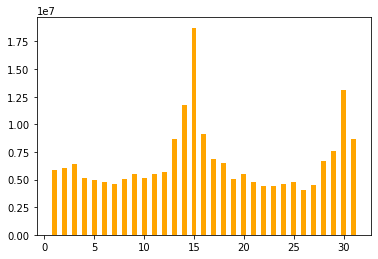

In [102]:
dia_brad = pd.pivot_table(pagos_brad,index=['DIA'],values=['PAGO'],aggfunc=np.sum)
dia_brad = pd.DataFrame(dia_brad.to_records())

plt.bar(dia_brad['DIA'],dia_brad['PAGO'],color='orange',width=0.5)
plt.show()

In [107]:
dia_brad.corr()

,DIA,PAGO
DIA,1.00000,0.13076
PAGO,0.13076,1.00000


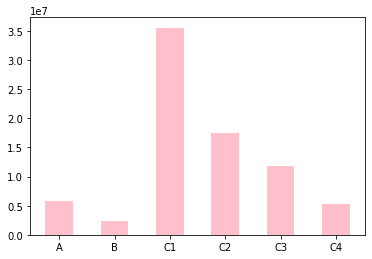

In [108]:
morosidad_brad = pd.pivot_table(pagos_brad,index=['BUCKET'],values=['PAGO'],aggfunc=np.sum)
morosidad_brad = pd.DataFrame(morosidad_brad.to_records())

plt.bar(morosidad_brad['BUCKET'],morosidad_brad['PAGO'],color='pink',width=0.5)
plt.show()

In [110]:
pagos_brad['AÑO-MES'] = pagos_brad['YEAR'].map(str)+'-'+pagos_brad['MONTH'].map(str)

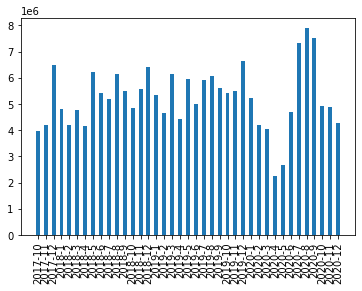

<Figure size 1080x288 with 0 Axes>

In [128]:
mes_brad = pd.pivot_table(pagos_brad,index=['AÑO-MES'],values=['PAGO'],aggfunc=np.sum)
mes_brad = pd.DataFrame(mes_brad.to_records())
mes_brad = mes_brad.iloc[[0,1,2,3,7,8,9,10,11,12,13,14,4,5,6,15,19,20,21,22,23,24,25,26,16,17,18,27,31,32,33,34,35,36,37,38,28,29,30],:]

plt.bar(mes_brad['AÑO-MES'],mes_brad['PAGO'],width=0.5)
plt.xticks(rotation=90)
plt.figure(figsize=(15,4))
plt.show()

In [ ]:
bins = [18,20,25,30,35,40,45,50,55,60,65,70,75.100]
names = ['18-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-70','71-75','75-100']
consolidado_pagos_brad['EDAD2'] = pd.cut(consolidado_pagos_brad['EDAD'],bins,)

# Pagos Liverpool

In [163]:
pagos_liver['Fecha pago'] = pd.to_datetime(pagos_liver['Fecha pago'],dayfirst=True)
pagos_liver['Month'] = pagos_liver['Fecha pago'].dt.month
pagos_liver['Year'] = pagos_liver['Fecha pago'].dt.year
pagos_liver['Day'] = pagos_liver['Fecha pago'].dt.day
pagos_liver.head(3)

,Cuenta,Fecha pago,Fecha Posteo,monto,Descripcion,Division,Month,Year,Day
0,0004178490000277468,2020-01-02,02/01/2020,500.0,5200000000008917,N2,1,2020,2
1,0000013000020401514,2020-01-02,02/01/2020,3376.0,005200000000007275,N2,1,2020,2
2,0000033000008868151,2020-01-02,02/01/2020,14000.0,005200000000005261,N2,1,2020,2


In [166]:
#Para COF
pagos_cof = pagos_liver.loc[pagos_liver['Division']=='COF']
pivot_cof = pd.pivot_table(pagos_cof,index=['Division','Month','Day'],columns=['Year'],values=['monto'],aggfunc=['sum'])
pivot_cof = pd.DataFrame(pivot_cof.to_records())
pivot_cof.columns = ['DIVISION','MES','DIA','PAGO 2020']
pivot_cof.fillna(0,inplace=True)
#pivot_cof['PAGO 2017'] = ['${:,.2f}'.format(x) for x in pivot_cof['PAGO 2017']]
#pivot_cof['PAGO 2018'] = ['${:,.2f}'.format(x) for x in pivot_cof['PAGO 2018']]
#pivot_cof['PAGO 2019'] = ['${:,.2f}'.format(x) for x in pivot_cof['PAGO 2019']]
pivot_cof['PAGO 2020'] = ['${:,.2f}'.format(x) for x in pivot_cof['PAGO 2020']]
pivot_cof

,DIVISION,MES,DIA,PAGO 2020
0,COF,6,18,"$5,900.00"
1,COF,7,1,"$1,600.00"
2,COF,7,2,"$11,600.00"
3,COF,7,6,$500.00
4,COF,7,7,"$4,591.00"
...,...,...,...,...
95,COF,10,26,"$2,868.50"
96,COF,10,27,"$10,594.00"
97,COF,10,28,"$33,445.77"
98,COF,10,29,"$24,791.00"


In [170]:
#Para pren N2
pagos_n2 = pagos_liver.loc[pagos_liver['Division']=='N2']
pivot_n2 = pd.pivot_table(pagos_n2,index=['Division','Month','Day'],columns=['Year'],values=['monto'],aggfunc=['sum'])
pivot_n2 = pd.DataFrame(pivot_n2.to_records())
pivot_n2.columns = ['DIVISION','MES','DIA','PAGO 2020']
pivot_n2.fillna(0,inplace=True)
#pivot_n2['PAGO 2017'] = ['${:,.2f}'.format(x) for x in pivot_n2['PAGO 2017']]
#pivot_n2['PAGO 2018'] = ['${:,.2f}'.format(x) for x in pivot_n2['PAGO 2018']]
#pivot_n2['PAGO 2019'] = ['${:,.2f}'.format(x) for x in pivot_n2['PAGO 2019']]
pivot_n2['PAGO 2020'] = ['${:,.2f}'.format(x) for x in pivot_n2['PAGO 2020']]
pivot_n2

,DIVISION,MES,DIA,PAGO 2020
0,N2,1,2,"$24,796.00"
1,N2,1,3,"$24,399.00"
2,N2,1,4,"$11,383.00"
3,N2,1,6,"$2,000.00"
4,N2,1,7,"$10,283.00"
...,...,...,...,...
287,N2,10,26,"$21,513.50"
288,N2,10,27,"$76,280.00"
289,N2,10,28,"$61,644.00"
290,N2,10,29,"$54,036.00"


In [171]:
#Para pren PREN
pagos_pren = pagos_liver.loc[pagos_liver['Division']=='PREN']
pivot_pren = pd.pivot_table(pagos_pren,index=['Division','Month','Day'],columns=['Year'],values=['monto'],aggfunc=['sum'])
pivot_pren = pd.DataFrame(pivot_pren.to_records())
pivot_pren.columns = ['DIVISION','MES','DIA','PAGO 2019','PAGO 2020']
pivot_pren.fillna(0,inplace=True)
#pivot_pren['PAGO 2017'] = ['${:,.2f}'.format(x) for x in pivot_n2['PAGO 2017']]
#pivot_n2['PAGO 2018'] = ['${:,.2f}'.format(x) for x in pivot_n2['PAGO 2018']]
pivot_pren['PAGO 2019'] = ['${:,.2f}'.format(x) for x in pivot_pren['PAGO 2019']]
pivot_pren['PAGO 2020'] = ['${:,.2f}'.format(x) for x in pivot_pren['PAGO 2020']]
pivot_pren

,DIVISION,MES,DIA,PAGO 2019,PAGO 2020
0,PREN,1,2,$0.00,"$24,332.00"
1,PREN,1,3,$0.00,"$15,616.43"
2,PREN,1,4,$0.00,"$18,621.00"
3,PREN,1,5,$0.00,"$5,447.00"
4,PREN,1,6,$0.00,"$62,202.00"
...,...,...,...,...,...
303,PREN,11,8,$0.00,"$5,711.00"
304,PREN,11,9,$0.00,"$61,100.00"
305,PREN,11,10,$0.00,"$3,000.00"
306,PREN,11,11,$0.00,"$48,262.00"


In [172]:
#Para pren PREN
pagos_sub = pagos_liver.loc[pagos_liver['Division']=='SUB']
pivot_sub = pd.pivot_table(pagos_sub,index=['Division','Month','Day'],columns=['Year'],values=['monto'],aggfunc=['sum'])
pivot_sub = pd.DataFrame(pivot_sub.to_records())
pivot_sub.columns = ['DIVISION','MES','DIA','PAGO 2020']
pivot_sub.fillna(0,inplace=True)
#pivot_pren['PAGO 2017'] = ['${:,.2f}'.format(x) for x in pivot_n2['PAGO 2017']]
#pivot_n2['PAGO 2018'] = ['${:,.2f}'.format(x) for x in pivot_n2['PAGO 2018']]
#pivot_pren['PAGO 2019'] = ['${:,.2f}'.format(x) for x in pivot_pren['PAGO 2019']]
pivot_sub['PAGO 2020'] = ['${:,.2f}'.format(x) for x in pivot_sub['PAGO 2020']]
pivot_sub

,DIVISION,MES,DIA,PAGO 2020
0,SUB,1,1,"$1,055.00"
1,SUB,1,2,"$23,304.00"
2,SUB,1,3,"$13,257.00"
3,SUB,1,4,"$7,843.00"
4,SUB,1,5,"$6,997.00"
...,...,...,...,...
279,SUB,10,26,"$6,360.00"
280,SUB,10,27,"$20,460.34"
281,SUB,10,28,"$29,563.00"
282,SUB,10,29,"$7,410.00"


In [173]:
#Para pren PREN
pagos_subdic = pagos_liver.loc[pagos_liver['Division']=='SUBDIC']
pivot_subdic = pd.pivot_table(pagos_subdic,index=['Division','Month','Day'],columns=['Year'],values=['monto'],aggfunc=['sum'])
pivot_subdic = pd.DataFrame(pivot_subdic.to_records())
pivot_subdic.columns = ['DIVISION','MES','DIA','PAGO 2020']
pivot_subdic.fillna(0,inplace=True)
#pivot_pren['PAGO 2017'] = ['${:,.2f}'.format(x) for x in pivot_n2['PAGO 2017']]
#pivot_n2['PAGO 2018'] = ['${:,.2f}'.format(x) for x in pivot_n2['PAGO 2018']]
#pivot_pren['PAGO 2019'] = ['${:,.2f}'.format(x) for x in pivot_pren['PAGO 2019']]
pivot_subdic['PAGO 2020'] = ['${:,.2f}'.format(x) for x in pivot_subdic['PAGO 2020']]
pivot_subdic

,DIVISION,MES,DIA,PAGO 2020
0,SUBDIC,1,3,"$3,600.00"
1,SUBDIC,1,4,"$3,526.22"
2,SUBDIC,1,5,"$3,319.00"
3,SUBDIC,1,21,"$2,000.00"
4,SUBDIC,1,22,"$4,374.00"
...,...,...,...,...
81,SUBDIC,10,19,"$2,000.00"
82,SUBDIC,10,20,"$1,000.00"
83,SUBDIC,10,23,"$3,081.00"
84,SUBDIC,10,29,$500.00


In [21]:
writer = pd.ExcelWriter(''+ruta+'/Reporte pagos Bradesco '+mes2+'.xlsx', engine='xlsxwriter')
pivot_mes.to_excel(writer,'C0 '+mes2+'',index=False,header=True)
pivot_4pv.to_excel(writer,'4PV',index=False,header=True)
pivot_5pv.to_excel(writer,'5PV',index=False,header=True)
pivot_6pv.to_excel(writer,'6PV',index=False,header=True)
pivot_bucket_a.to_excel(writer,'A',index=False,header=True)
pivot_bucket_b.to_excel(writer,'B',index=False,header=True)
pivot_bucket_c1.to_excel(writer,'C1',index=False,header=True)
pivot_bucket_c2.to_excel(writer,'C2',index=False,header=True)
pivot_bucket_c3.to_excel(writer,'C3',index=False,header=True)
pivot_bucket_c4.to_excel(writer,'C4',index=False,header=True)

writer.save()
writer.close()

In [175]:
writer = pd.ExcelWriter(''+ruta+'Reporte pagos Liverpool Dic.xlsx', engine='xlsxwriter')
pivot_cof.to_excel(writer,'COF',index=False,header=True)
pivot_n2.to_excel(writer,'N2',index=False,header=True)
pivot_pren.to_excel(writer,'PREN',index=False,header=True)
pivot_sub.to_excel(writer,'SUB',index=False,header=True)
pivot_subdic.to_excel(writer,'SUBDIC',index=False,header=True)

writer.save()
writer.close()